In [113]:
import keras

In [114]:
# https://github.com/fchollet/keras/issues/2115

In [115]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [116]:
print X_train.shape
print y_train.shape

(60000, 28, 28)
(60000,)


In [117]:
import matplotlib.pyplot as plt
# So the figures are shown inline.
%matplotlib inline 
import numpy as np

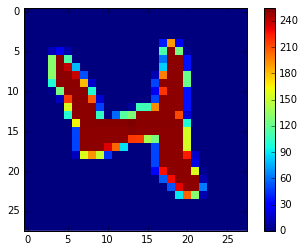

In [118]:
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [119]:
y_train[idx]

4

In [120]:
X_train.max()

255

In [121]:
X_train.dtype

dtype('uint8')

In [122]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [123]:
X_train.dtype

dtype('float32')

In [124]:
# Normalize so the max value is 1.
X_train /= 255

In [125]:
X_train.max()

1.0

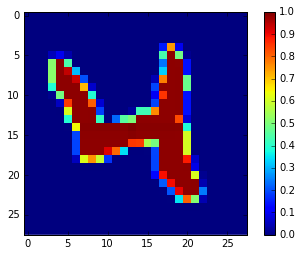

In [126]:
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [127]:
nb_classes = 10

In [128]:
Y_train = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.np_utils.to_categorical

In [129]:
Y_train[idx]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [130]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(10000, 28*28)

In [131]:
from keras.layers import Dense, Activation

In [132]:
model = keras.models.Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [133]:
from keras.optimizers import SGD

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, nb_epoch=3, batch_size=32)

Epoch 1/3
60000/60000 [==============================] - 4s - loss: 0.3506 - acc: 0.8982     
Epoch 2/3
52480/60000 [=========================>....] - ETA: 0s - loss: 0.1939 - acc: 0.9455

In [ ]:
pred_classes = model.predict_classes(X_test, batch_size=100)

In [ ]:
np.mean(pred_classes == y_test)